In [1]:
import zipfile
from urllib import request
 
import matplotlib.image as mpimg
import random
%matplotlib inline
import cv2
from glob import glob
import keras
 
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Reshape, concatenate, Concatenate,Dense, Flatten
from keras.layers import BatchNormalization, RepeatVector, Permute, Activation,Lambda,Add,Dropout,SpatialDropout2D
from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.backend import clear_session
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.layers import MaxPooling2D, Input, Dense, Flatten
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec
from sp import Subpixel 
import tensorflow as tf 
import keras
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
# aita die akta tensor e sob image k nie astasi
 
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,add

In [3]:
from SpectralNormalizationKeras import DenseSN, ConvSN2D

from func.soat import dtl,up,ca,rg,rcab,rir,normalize,denormalize,w2,w3    

In [4]:
 
from func.fun import vds,urb,cnb,ad,resm,resc,corb,bg,drb,drv,urv,nos,tf_log10,ssim,PSNR,lcl,bol,br
from func.fun import ref,resl,resn,m1,m2,psp,au,ba,m4,dt,w3,sdtl,unt,vts 
from func.f2 import  reb,ridtn,atn
def plot_sample(lr, sr):
    plt.figure(figsize=(20, 10))

    images = [lr, sr]
    titles = ['denoised', 'noisy']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
def imgps(x):
    p = x[0] * 255
    p = p.astype(np.uint8)
    p = Image.fromarray(p)
    return p

In [5]:
#original data
b=np.load('dns.npy')
w=128

#original val data
v=np.load('vns.npy')
w=128



In [6]:
#original data
b=np.load('dn256n.npy')
w=128
#original val data
v=np.load('dn256t.npy')
w=128

 

In [7]:
b.shape 


(800, 256, 256, 3)

In [8]:
def cl(y_true, y_pred):
    diff = y_pred - y_true
    o=K.mean(K.sqrt(K.square(diff) + K.epsilon())) 
    return o*20

def fti(x):
    avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(x)
    assert avg_pool._keras_shape[-1] == 1
    max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(x)
    assert max_pool._keras_shape[-1] == 1
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    assert concat._keras_shape[-1] == 2
    x = Conv2D(3, kernel_size=3, strides=1, padding='same')(concat)
    x = Activation('relu')(x)
    return x 

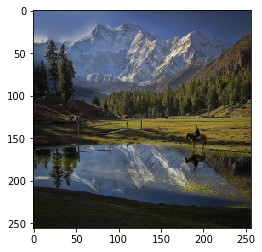

In [9]:
plt.figure(figsize=(4, 4))
import tensorflow as tf 
n=b[1]
plt.imshow(n)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


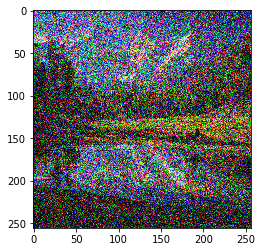

In [10]:
plt.figure(figsize=(4, 4)) 
#training noisy data
xt = b 
sigma=np.random.exponential(0.25)
#n1=10.19*np.random.randn(*xt.shape) 
f=1
sigma=80/255
n1=f* np.random.normal(scale=sigma, size=xt.shape)
#n1=np.clip(n1, 0,1.5)
tns=xt+n1 
#tns=np.clip(tns, 0, 1)
n=tns[1]
plt.imshow(n)
rs=xt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


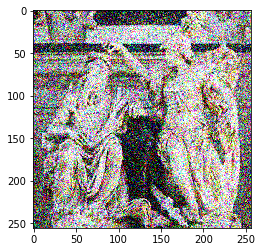

In [11]:
plt.figure(figsize=(4, 4))
#noisy val data
xs = v
#sigma=np.random.exponential(0.15)
n2=f* np.random.normal(scale=sigma, size=xs.shape)
#n2=np.clip(n2, 0, 1.5)
vns=xs+n2 
#vns=np.clip(vns, 0, 1)
n=vns[76]
plt.imshow(n)

In [12]:

def psnr(y_true,y_pred):
    return tf.image.psnr(y_true,y_pred,1.0)
def ssim(y_true,y_pred):
    return tf.image.ssim(y_true,y_pred,1.0)

def cnt(b):
    b = Conv2DTranspose(3, 3, strides=1, padding='same')(b)
 
    return b

def v1(b):
    x=Subpixel(filters=3, kernel_size=1, r=1, padding='same')(b) 
    x=w3(x,32)
    x=Subpixel(filters=3, kernel_size=1, r=1, padding='same')(x) 
    x=w3(x,32)
    return x

def rem(input_tensor, features):
    kernel=3
    x = Conv2D(features, (kernel, kernel), activation='relu', padding='same')(input_tensor)
    x = Conv2D(features, (kernel, kernel), padding='same')(x)
    return add([input_tensor, x])

def v2(b):
    x= ConvSN2D(32, kernel_size=1, strides=1, padding='same')(b)    
    x=vds(x,8) 
    x=w3(x,32)
    x=vds(x,8) 
    x=Subpixel(filters=3, kernel_size=1, r=1, padding='same')(x)  
    x=w3(x,32)
    x = Activation('relu')(x)
    return x


 
 


 




In [13]:
from keras.layers import Input, Conv2D, Dense,  Activation,Convolution2D,Conv2DTranspose, MaxPooling2D,BatchNormalization, UpSampling2D
from keras.models import Model

w=b.shape[2]
input_img = Input(shape=(w,w,3))
#x= ConvSN2D(64, kernel_size=3, strides=1, padding='same')(input_img)  
x = f = Conv2D(16, 3, padding='same')(input_img)
b1=unt(f,8) 
b2=unt(f,8)  
f= concatenate([b1,b2,vts(b1,6),vts(b2,6)], axis = 3)
f = Conv2D(3, 3, padding='same')(f)
y = w3(f,32)

 
 
 
model = Model(input_img, y)
model.compile(loss='mae', optimizer='adam',    metrics=[psnr,ssim, "accuracy"])
 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


D:\1A work\jupyter\udac\super res\func\fun.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, kernel_size=1, strides=1, padding="same")`
  im=Conv2D(3,kernel_size=1, strides=1, border_mode='same')(im)
D:\1A work\jupyter\udac\super res\func\fun.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, kernel_size=1, strides=1, padding="same")`
  im=Conv2D(f,kernel_size=1, strides=1, border_mode='same')(im)
D:\1A work\jupyter\udac\super res\func\fun.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, kernel_size=1, strides=1, padding="same")`
  x=Conv2D(3,kernel_size=1, strides=1, border_mode='same')(x)


In [14]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.4,
                              patience = 6,
                              verbose = 1,
                              min_delta = 0.0001)

filepath="weightdns.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

model.compile(loss='mae', optimizer='adam',    metrics=[psnr,ssim, "accuracy"])

In [15]:
#history = model.fit(tns, b,validation_split=0.2 , epochs=7000, batch_size=16, callbacks = [checkpoint,reduce_lr], shuffle=True)
history = model.fit(tns, b,validation_split=0.2 , epochs=7000, batch_size=8, callbacks = [checkpoint,reduce_lr])

Instructions for updating:
Use tf.cast instead.
Train on 640 samples, validate on 160 samples
Epoch 1/7000
640/640 [==============================] - 38s 59ms/step - loss: 0.1151 - psnr: 17.1765 - ssim: 0.4665 - acc: 0.4078 - val_loss: 0.0910 - val_psnr: 18.6641 - val_ssim: 0.5341 - val_acc: 0.4362

Epoch 00001: val_loss improved from inf to 0.09102, saving model to weightdns.hdf5
Epoch 2/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0897 - psnr: 18.8609 - ssim: 0.5485 - acc: 0.4737 - val_loss: 0.0893 - val_psnr: 18.7967 - val_ssim: 0.5665 - val_acc: 0.5047

Epoch 00002: val_loss improved from 0.09102 to 0.08928, saving model to weightdns.hdf5
Epoch 3/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0852 - psnr: 19.2939 - ssim: 0.5721 - acc: 0.4830 - val_loss: 0.0857 - val_psnr: 19.1873 - val_ssim: 0.5740 - val_acc: 0.5323

Epoch 00003: val_loss improved from 0.08928 to 0.08566, saving model to weightdns.hdf5
Epoch 4/7000
640/640 [======

640/640 [==============================] - 27s 42ms/step - loss: 0.0544 - psnr: 22.8053 - ssim: 0.6706 - acc: 0.7179 - val_loss: 0.0532 - val_psnr: 22.9860 - val_ssim: 0.6723 - val_acc: 0.6891

Epoch 00029: val_loss did not improve from 0.05292
Epoch 30/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0538 - psnr: 22.8736 - ssim: 0.6712 - acc: 0.7168 - val_loss: 0.0522 - val_psnr: 23.1406 - val_ssim: 0.6725 - val_acc: 0.7230

Epoch 00030: val_loss improved from 0.05292 to 0.05218, saving model to weightdns.hdf5
Epoch 31/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0533 - psnr: 22.9385 - ssim: 0.6739 - acc: 0.7162 - val_loss: 0.0526 - val_psnr: 23.1053 - val_ssim: 0.6719 - val_acc: 0.7333

Epoch 00031: val_loss did not improve from 0.05218
Epoch 32/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0551 - psnr: 22.7300 - ssim: 0.6719 - acc: 0.7131 - val_loss: 0.0520 - val_psnr: 23.1534 - val_ssim: 0.6747 - val_acc: 0

Epoch 59/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0507 - psnr: 23.2811 - ssim: 0.6931 - acc: 0.7311 - val_loss: 0.0504 - val_psnr: 23.3570 - val_ssim: 0.6874 - val_acc: 0.7005

Epoch 00059: val_loss did not improve from 0.04981
Epoch 60/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0507 - psnr: 23.2849 - ssim: 0.6936 - acc: 0.7310 - val_loss: 0.0497 - val_psnr: 23.4633 - val_ssim: 0.6918 - val_acc: 0.7358

Epoch 00060: val_loss improved from 0.04981 to 0.04974, saving model to weightdns.hdf5
Epoch 61/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0509 - psnr: 23.2677 - ssim: 0.6929 - acc: 0.7297 - val_loss: 0.0496 - val_psnr: 23.4706 - val_ssim: 0.6906 - val_acc: 0.7289

Epoch 00061: val_loss improved from 0.04974 to 0.04959, saving model to weightdns.hdf5
Epoch 62/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0507 - psnr: 23.2921 - ssim: 0.6936 - acc: 0.7321 - val_loss: 0.0501 -

640/640 [==============================] - 27s 42ms/step - loss: 0.0492 - psnr: 23.4656 - ssim: 0.6976 - acc: 0.7357 - val_loss: 0.0489 - val_psnr: 23.5667 - val_ssim: 0.6938 - val_acc: 0.7421

Epoch 00088: val_loss did not improve from 0.04890
Epoch 89/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0492 - psnr: 23.4669 - ssim: 0.6978 - acc: 0.7360 - val_loss: 0.0489 - val_psnr: 23.5720 - val_ssim: 0.6931 - val_acc: 0.7433

Epoch 00089: val_loss improved from 0.04890 to 0.04888, saving model to weightdns.hdf5

Epoch 00089: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.
Epoch 90/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0492 - psnr: 23.4691 - ssim: 0.6977 - acc: 0.7371 - val_loss: 0.0489 - val_psnr: 23.5695 - val_ssim: 0.6931 - val_acc: 0.7431

Epoch 00090: val_loss improved from 0.04888 to 0.04887, saving model to weightdns.hdf5
Epoch 91/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.04

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00145: val_loss did not improve from 0.04885
Epoch 146/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00146: val_loss did not improve from 0.04885
Epoch 147/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00147: val_loss did not improve from 0.04885
Epoch 148/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4767 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00148: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4759 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00175: val_loss did not improve from 0.04885
Epoch 176/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00176: val_loss did not improve from 0.04885
Epoch 177/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4768 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00177: val_loss did not improve from 0.04885
Epoch 178/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00178: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00205: val_loss did not improve from 0.04885
Epoch 206/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00206: val_loss did not improve from 0.04885
Epoch 207/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00207: val_loss did not improve from 0.04885
Epoch 208/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6978 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00208: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00235: val_loss did not improve from 0.04885
Epoch 236/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4760 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00236: val_loss did not improve from 0.04885
Epoch 237/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7370 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00237: val_loss did not improve from 0.04885
Epoch 238/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00238: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00265: val_loss did not improve from 0.04885
Epoch 266/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00266: val_loss did not improve from 0.04885
Epoch 267/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00267: val_loss did not improve from 0.04885
Epoch 268/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00268: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00295: val_loss did not improve from 0.04885
Epoch 296/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6980 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00296: val_loss did not improve from 0.04885
Epoch 297/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00297: val_loss did not improve from 0.04885
Epoch 298/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4759 - ssim: 0.6978 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00298: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00325: val_loss did not improve from 0.04885
Epoch 326/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00326: val_loss did not improve from 0.04885
Epoch 327/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4768 - ssim: 0.6979 - acc: 0.7370 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00327: val_loss did not improve from 0.04885
Epoch 328/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00328: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4760 - ssim: 0.6979 - acc: 0.7370 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00355: val_loss did not improve from 0.04885
Epoch 356/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00356: val_loss did not improve from 0.04885
Epoch 357/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00357: val_loss did not improve from 0.04885
Epoch 358/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00358: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00385: val_loss did not improve from 0.04885
Epoch 386/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7370 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00386: val_loss did not improve from 0.04885
Epoch 387/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4767 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00387: val_loss did not improve from 0.04885
Epoch 388/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00388: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00415: val_loss did not improve from 0.04885
Epoch 416/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00416: val_loss did not improve from 0.04885
Epoch 417/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00417: val_loss did not improve from 0.04885
Epoch 418/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00418: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00445: val_loss did not improve from 0.04885
Epoch 446/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7370 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00446: val_loss did not improve from 0.04885
Epoch 447/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4767 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00447: val_loss did not improve from 0.04885
Epoch 448/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7370 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00448: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00475: val_loss did not improve from 0.04885
Epoch 476/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00476: val_loss did not improve from 0.04885
Epoch 477/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00477: val_loss did not improve from 0.04885
Epoch 478/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6978 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00478: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4758 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00505: val_loss did not improve from 0.04885
Epoch 506/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7370 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00506: val_loss did not improve from 0.04885
Epoch 507/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00507: val_loss did not improve from 0.04885
Epoch 508/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00508: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00535: val_loss did not improve from 0.04885
Epoch 536/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00536: val_loss did not improve from 0.04885
Epoch 537/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00537: val_loss did not improve from 0.04885
Epoch 538/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00538: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00565: val_loss did not improve from 0.04885
Epoch 566/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00566: val_loss did not improve from 0.04885
Epoch 567/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00567: val_loss did not improve from 0.04885
Epoch 568/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00568: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00595: val_loss did not improve from 0.04885
Epoch 596/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00596: val_loss did not improve from 0.04885
Epoch 597/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00597: val_loss did not improve from 0.04885
Epoch 598/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00598: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00625: val_loss did not improve from 0.04885
Epoch 626/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00626: val_loss did not improve from 0.04885
Epoch 627/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00627: val_loss did not improve from 0.04885
Epoch 628/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00628: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4760 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00655: val_loss did not improve from 0.04885
Epoch 656/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00656: val_loss did not improve from 0.04885
Epoch 657/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4760 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00657: val_loss did not improve from 0.04885
Epoch 658/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00658: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7370 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00685: val_loss did not improve from 0.04885
Epoch 686/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00686: val_loss did not improve from 0.04885
Epoch 687/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00687: val_loss did not improve from 0.04885
Epoch 688/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00688: val_loss did 

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00716: val_loss did not improve from 0.04885
Epoch 717/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00717: val_loss did not improve from 0.04885
Epoch 718/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6978 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00718: val_loss did not improve from 0.04885
Epoch 719/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00719: val_loss did 


Epoch 00747: val_loss did not improve from 0.04885
Epoch 748/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00748: val_loss did not improve from 0.04885
Epoch 749/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00749: val_loss did not improve from 0.04885
Epoch 750/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00750: val_loss did not improve from 0.04885
Epoch 751/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4767 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.57


Epoch 00810: val_loss did not improve from 0.04885
Epoch 811/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00811: val_loss did not improve from 0.04885
Epoch 812/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4767 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00812: val_loss did not improve from 0.04885
Epoch 813/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00813: val_loss did not improve from 0.04885
Epoch 814/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.57


Epoch 00873: val_loss did not improve from 0.04885
Epoch 874/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00874: val_loss did not improve from 0.04885
Epoch 875/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00875: val_loss did not improve from 0.04885
Epoch 876/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00876: val_loss did not improve from 0.04885
Epoch 877/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.57


Epoch 00936: val_loss did not improve from 0.04885
Epoch 937/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00937: val_loss did not improve from 0.04885
Epoch 938/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4768 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00938: val_loss did not improve from 0.04885
Epoch 939/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 00939: val_loss did not improve from 0.04885
Epoch 940/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.57


Epoch 00999: val_loss did not improve from 0.04885
Epoch 1000/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01000: val_loss did not improve from 0.04885
Epoch 1001/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01001: val_loss did not improve from 0.04885
Epoch 1002/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4767 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01002: val_loss did not improve from 0.04885
Epoch 1003/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 2

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6978 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01062: val_loss did not improve from 0.04885
Epoch 1063/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01063: val_loss did not improve from 0.04885
Epoch 1064/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01064: val_loss did not improve from 0.04885
Epoch 1065/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01065: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01124: val_loss did not improve from 0.04885
Epoch 1125/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01125: val_loss did not improve from 0.04885
Epoch 1126/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01126: val_loss did not improve from 0.04885
Epoch 1127/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4767 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01127: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01186: val_loss did not improve from 0.04885
Epoch 1187/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01187: val_loss did not improve from 0.04885
Epoch 1188/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01188: val_loss did not improve from 0.04885
Epoch 1189/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01189: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01248: val_loss did not improve from 0.04885
Epoch 1249/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01249: val_loss did not improve from 0.04885
Epoch 1250/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01250: val_loss did not improve from 0.04885
Epoch 1251/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01251: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01310: val_loss did not improve from 0.04885
Epoch 1311/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4767 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01311: val_loss did not improve from 0.04885
Epoch 1312/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01312: val_loss did not improve from 0.04885
Epoch 1313/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01313: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01372: val_loss did not improve from 0.04885
Epoch 1373/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01373: val_loss did not improve from 0.04885
Epoch 1374/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01374: val_loss did not improve from 0.04885
Epoch 1375/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4759 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01375: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01434: val_loss did not improve from 0.04885
Epoch 1435/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01435: val_loss did not improve from 0.04885
Epoch 1436/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01436: val_loss did not improve from 0.04885
Epoch 1437/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4771 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01437: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01496: val_loss did not improve from 0.04885
Epoch 1497/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01497: val_loss did not improve from 0.04885
Epoch 1498/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01498: val_loss did not improve from 0.04885
Epoch 1499/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01499: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4768 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01558: val_loss did not improve from 0.04885
Epoch 1559/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01559: val_loss did not improve from 0.04885
Epoch 1560/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4758 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01560: val_loss did not improve from 0.04885
Epoch 1561/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01561: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4768 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01620: val_loss did not improve from 0.04885
Epoch 1621/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01621: val_loss did not improve from 0.04885
Epoch 1622/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01622: val_loss did not improve from 0.04885
Epoch 1623/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01623: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01682: val_loss did not improve from 0.04885
Epoch 1683/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01683: val_loss did not improve from 0.04885
Epoch 1684/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01684: val_loss did not improve from 0.04885
Epoch 1685/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01685: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7373 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01744: val_loss did not improve from 0.04885
Epoch 1745/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6978 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01745: val_loss did not improve from 0.04885
Epoch 1746/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01746: val_loss did not improve from 0.04885
Epoch 1747/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01747: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01806: val_loss did not improve from 0.04885
Epoch 1807/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4767 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01807: val_loss did not improve from 0.04885
Epoch 1808/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01808: val_loss did not improve from 0.04885
Epoch 1809/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01809: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01868: val_loss did not improve from 0.04885
Epoch 1869/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4767 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01869: val_loss did not improve from 0.04885
Epoch 1870/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01870: val_loss did not improve from 0.04885
Epoch 1871/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01871: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01930: val_loss did not improve from 0.04885
Epoch 1931/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4763 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01931: val_loss did not improve from 0.04885
Epoch 1932/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4766 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01932: val_loss did not improve from 0.04885
Epoch 1933/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4761 - ssim: 0.6979 - acc: 0.7372 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01933: val_loss d

640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4765 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01992: val_loss did not improve from 0.04885
Epoch 1993/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4760 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01993: val_loss did not improve from 0.04885
Epoch 1994/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4764 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01994: val_loss did not improve from 0.04885
Epoch 1995/7000
640/640 [==============================] - 27s 42ms/step - loss: 0.0491 - psnr: 23.4762 - ssim: 0.6979 - acc: 0.7371 - val_loss: 0.0488 - val_psnr: 23.5736 - val_ssim: 0.6931 - val_acc: 0.7436

Epoch 01995: val_loss d

KeyboardInterrupt: 

In [16]:
 model.load_weights('weightdns.hdf5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 576x432 with 0 Axes>

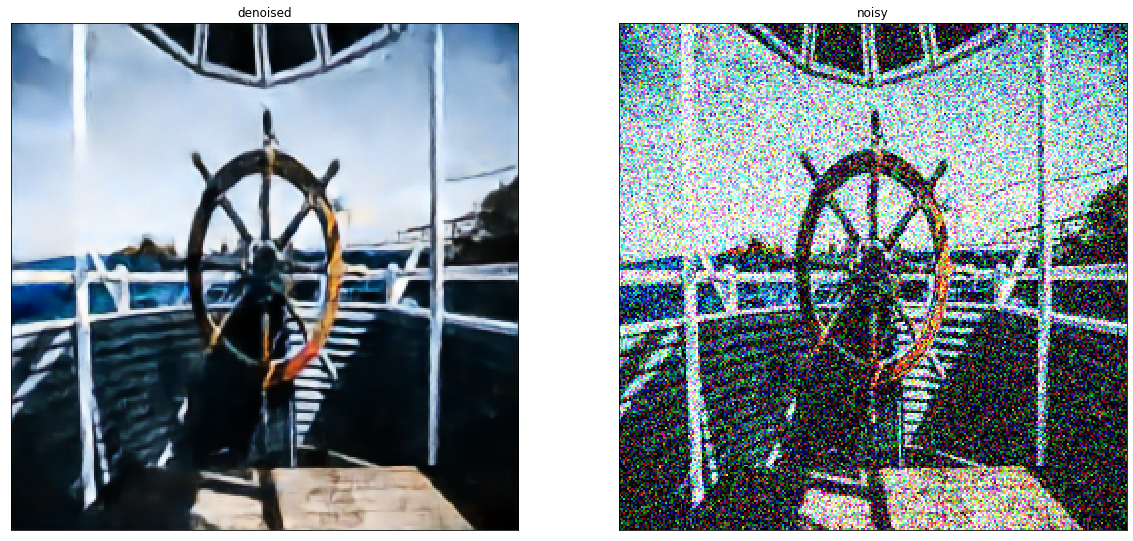

In [23]:
i=17
plt.figure(figsize=(8, 6))
q =  (vns[i])
 
 
per =  model.predict(vns)
p=per[i]
 
 
plot_sample(p,q)
 
 

In [ ]:

#goood model

from keras.layers import Input, Conv2D, Dense,  Activation,Convolution2D,Conv2DTranspose, MaxPooling2D,BatchNormalization, UpSampling2D
from keras.models import Model

w=b.shape[2]
input_img = Input(shape=(w,w,3))
#x= ConvSN2D(64, kernel_size=3, strides=1, padding='same')(input_img)  
for i in range (5):
    inp=uplp(input_img)
inp=Conv2D(16, kernel_size=7, strides=1, padding='same')(inp) 
     
x0=mdsr1(inp,32)
u=UpSampling2D(size=(2,2))(x0)
x=MaxPooling2D((3, 3), strides=2, padding='same')(u)
x=concatenate([x,x0,input_img,inp], axis = 3)

x=Conv2D(3, kernel_size=3, strides=1, padding='same')(x) 
    
   
 
model = Model(input_img, x)
model.compile(loss='mae', optimizer='adam',    metrics=[psnr,ssim, "accuracy"])